### LINEAR REGRESSION
In this assignment we try to model the 'Estimated Price' as a linear relation of the other elements

In [2]:
# Importing libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### CLASSES IN PYTHON
Although this might look scary to implement, go about it one function at a time.  
Using classes help with keeping track of multiple models and makes your overall code much tidier.

In [3]:
class LinearRegression:
    def __init__(self) -> None:
        self.weights = None
        self.bias = None

    def predict(self, X):
        return X @ self.weights + self.bias

    def fit(self, X, y, epochs=1000, learning_rate=0.01, norm=2, threshold=1e-6, lambda_reg=0.0):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        prev_loss = float('inf')

        for _ in range(epochs):
            y_pred = self.predict(X)
            error = y_pred - y

            dw = (1 / n_samples) * (X.T @ error)
            db = (1 / n_samples) * error.sum()

            if lambda_reg > 0:
                dw += lambda_reg * np.sign(self.weights)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db

            loss = (error ** 2).mean()
            if abs(prev_loss - loss) < threshold:
                break
            prev_loss = loss


### Importing and Converting Data
Some features in a dataset are not of numerical type and are either categorical or boolean.  
To get past this, we convert the columns by using one-hot encoding.

In [15]:
import pandas as pd
import numpy as np

# -------------------------------
# 1. Load the dataset
# -------------------------------
df = pd.read_csv("linear_data (1).csv")

# -------------------------------
# 2. Separate features and target
# -------------------------------
X = df.drop(columns=["Estimated Price"])   # input features
y = df["Estimated Price"]                  # target variable

# -------------------------------
# 3. Convert boolean columns to int
# -------------------------------
for col in X.columns:
    if X[col].dtype == bool:
        X[col] = X[col].astype(int)

# -------------------------------
# 4. One-hot encode categorical columns
# -------------------------------
X = pd.get_dummies(X, drop_first=True)

# -------------------------------
# 5. Convert to NumPy arrays (FINAL STEP)
# -------------------------------
X = X.values.astype(float)
y = y.values.astype(float)

print("Data loaded and processed successfully")
print("X shape:", X.shape)
print("y shape:", y.shape)


Data loaded and processed successfully
X shape: (1000, 12)
y shape: (1000,)


### Test-train split
Overfitting is one of the biggest problems in machine learning. Overfitting occurs when the model is trained to be very accurate on the given dataset but performs very poorly on a different but similar dataset.
To check for overfitting, we split our dataset into test and train sets and check the accuracy/loss of the model.

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Z-Score Standardization
Since some features might have much higher values than the others, for weights of similar magnitude, the model will mainly focus only on features with large values.  
To overcome this, we standardize each feature using Z-Score Standardization so that all features are treated equally

In [17]:
def z_score(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    X_norm = (X - mean) / std
    return X_norm, mean, std


In [18]:
# Normalizing the data
x_train, x_mean, x_std = z_score(X_train)
x_test = (X_test - x_mean) / x_std

MSE loss: 4619903.843159038


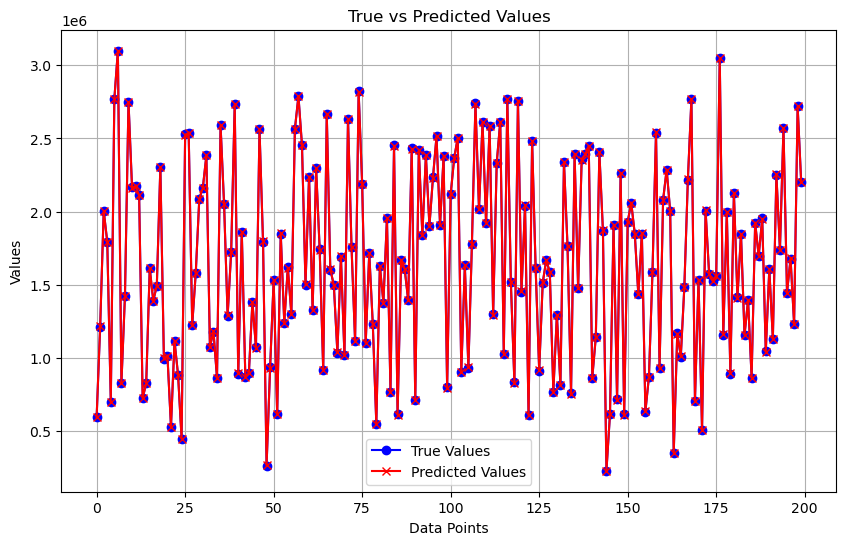

In [22]:
# Train the model
model = LinearRegression()

model.fit(
    x_train,
    y_train,
    epochs=1000,
    learning_rate=0.01,
    norm=2,
    threshold=1e-4
)

# 🔑 Predict FIRST
y_pred = model.predict(x_test)

# 🔑 THEN compute MSE
print("MSE loss:", np.mean((y_pred - y_test) ** 2))

# Plot results
indices = np.arange(len(y_test))

plt.figure(figsize=(10, 6))
plt.plot(indices, y_test, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()
